In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.metrics import mean_squared_error
from math import sqrt
import geopandas as gpd

%matplotlib inline

In [59]:
# Graphing parameters
#sns.set(style="white")
rc = {'figure.figsize':(5,5),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Arial',
      'font.size' : 15,
      'figure.dpi':100}

plt.rcParams.update(rc)

In [60]:
# Helper Functions

#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

def annotate(data, **kws):
    n = polyfit(x1, y1, 1).get('r_squared')
    ax = plt.gca()
    g.axes[0,0].text(.70, .25, "r2={:.2f}".format(n), transform=ax.transAxes)


r = -0.23217772778668394 pval = 0.20880878634734582
Regression line: y=5.13+-3.24x, r=-0.23


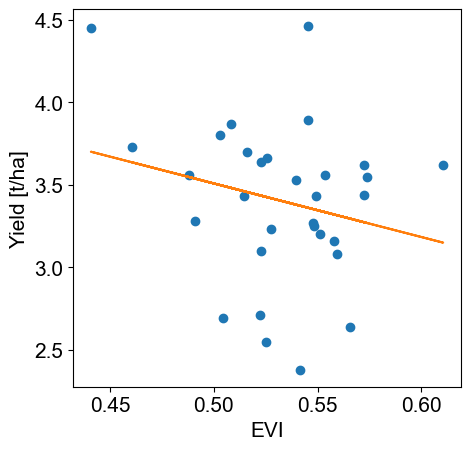

In [61]:
# EVI RF 2017

param_of_interest = 'EVI_17'
yearStudy = 2017

######

gdf = gpd.read_file('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/all_params_DS.gpkg')
gdfADM = gdf.groupby(['ADM3_EN','Class']).mean().reset_index()
gdfADM_RF = gdfADM.loc[gdfADM['Class']=='Rain-fed Rice']
gdfADM_IR = gdfADM.loc[gdfADM['Class']=='Irrigated Rice']

# FINAL ONE!!!!!! EVI
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')
#harvest = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
#production = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#production = production[(production.param=='production')].reset_index(drop=True)
data = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
data = data[(data.param=='yield')].reset_index(drop=True)
####### Select by criteria
#data = data[(data.year <= yearStudy) & (data.year >= yearStudy)].groupby(['muni','ecosystem']).mean().reset_index()
#######
data = data.loc[data['ecosystem']=='rf'] # rf   OR    irri
#data
####
merged = pd.merge(data, gdfADM_RF, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)

corr = merged.loc[:,[param_of_interest,'value']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient

#g = sns.scatterplot(x=param_of_interest, y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
#               );
#plt.title('EVI - 2017 - Whole Area', fontsize=17)
#g.set_xlabel('EVI')
#g.set_ylabel('Annual Yield [t/ha]')
#g.text(.74,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
#sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.show()

x = np.array(merged.loc[:,[param_of_interest]]).flatten()
y = np.array(merged.loc[:,['value']]).flatten()
print('r =', scipy.stats.pearsonr(x,y)[0], 'pval =', scipy.stats.pearsonr(x,y)[1])
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('EVI')
ax.set_ylabel('Yield [t/ha]')
#ax.legend(facecolor='white')
plt.show()

r = 0.12100638647670348 pval = 0.7079486168200663
Regression line: y=3.48+1.94x, r=0.12


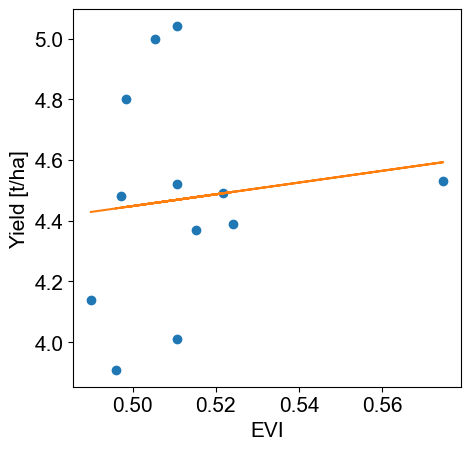

In [55]:
# EVI IRRI 2017

param_of_interest = 'EVI_17'
yearStudy = 2017

######

gdf = gpd.read_file('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/all_params_DS.gpkg')
gdfADM = gdf.groupby(['ADM3_EN','Class']).mean().reset_index()
gdfADM_RF = gdfADM.loc[gdfADM['Class']=='Rain-fed Rice']
gdfADM_IR = gdfADM.loc[gdfADM['Class']=='Irrigated Rice']

# FINAL ONE!!!!!! EVI
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')
#harvest = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
#production = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#production = production[(production.param=='production')].reset_index(drop=True)
data = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
data = data[(data.param=='yield')].reset_index(drop=True)
####### Select by criteria
#data = data[(data.year <= yearStudy) & (data.year >= yearStudy)].groupby(['muni','ecosystem']).mean().reset_index()
#######
data = data.loc[data['ecosystem']=='irri'] # rf   OR    irri
#data
####
merged = pd.merge(data, gdfADM_IR, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)

corr = merged.loc[:,[param_of_interest,'value']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient

#g = sns.scatterplot(x=param_of_interest, y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
#               );
#plt.title('EVI - 2017 - Whole Area', fontsize=17)
#g.set_xlabel('EVI')
#g.set_ylabel('Annual Yield [t/ha]')
#g.text(.74,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
#sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.show()

x = np.array(merged.loc[:,[param_of_interest]]).flatten()
y = np.array(merged.loc[:,['value']]).flatten()
print('r =', scipy.stats.pearsonr(x,y)[0], 'pval =', scipy.stats.pearsonr(x,y)[1])
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('EVI')
ax.set_ylabel('Yield [t/ha]')
#ax.legend(facecolor='white')
plt.show()

r = -0.15225676068951016 pval = 0.4135419815929532
Regression line: y=5.01+-2.17x, r=-0.15


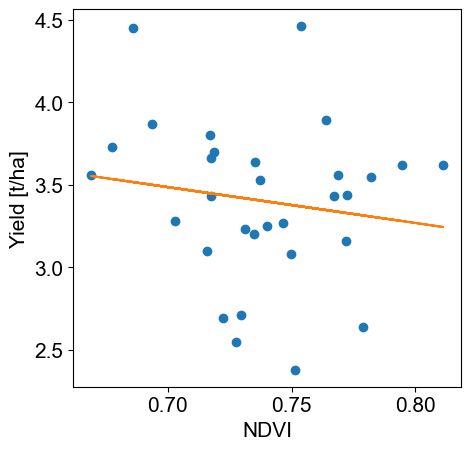

In [62]:
# NDVI RF 2017

param_of_interest = 'NDVI_17'
yearStudy = 2017

######

gdf = gpd.read_file('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/all_params_DS.gpkg')
gdfADM = gdf.groupby(['ADM3_EN','Class']).mean().reset_index()
gdfADM_RF = gdfADM.loc[gdfADM['Class']=='Rain-fed Rice']
gdfADM_IR = gdfADM.loc[gdfADM['Class']=='Irrigated Rice']

# FINAL ONE!!!!!! EVI
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')
#harvest = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
#production = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#production = production[(production.param=='production')].reset_index(drop=True)
data = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
data = data[(data.param=='yield')].reset_index(drop=True)
####### Select by criteria
#data = data[(data.year <= yearStudy) & (data.year >= yearStudy)].groupby(['muni','ecosystem']).mean().reset_index()
#######
data = data.loc[data['ecosystem']=='rf'] # rf   OR    irri
#data
####
merged = pd.merge(data, gdfADM_RF, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)

corr = merged.loc[:,[param_of_interest,'value']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient

#g = sns.scatterplot(x=param_of_interest, y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
#               );
#plt.title('EVI - 2017 - Whole Area', fontsize=17)
#g.set_xlabel('EVI')
#g.set_ylabel('Annual Yield [t/ha]')
#g.text(.74,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
#sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.show()

x = np.array(merged.loc[:,[param_of_interest]]).flatten()
y = np.array(merged.loc[:,['value']]).flatten()
print('r =', scipy.stats.pearsonr(x,y)[0], 'pval =', scipy.stats.pearsonr(x,y)[1])
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('NDVI')
ax.set_ylabel('Yield [t/ha]')
#ax.legend(facecolor='white')
plt.show()

r = -0.023148495276536105 pval = 0.9430736815194166
Regression line: y=4.72+-0.35x, r=-0.02


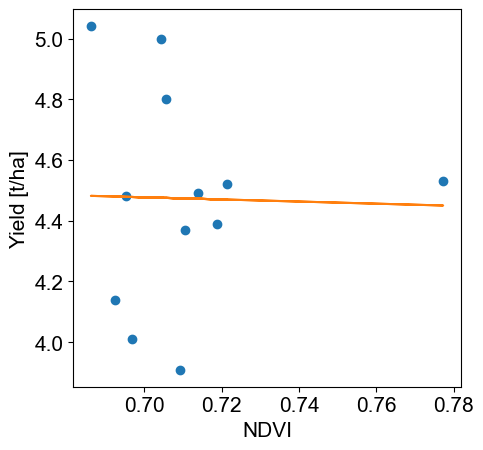

In [63]:
# NDVI IRRI 2017

param_of_interest = 'NDVI_17'
yearStudy = 2017

######

gdf = gpd.read_file('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/all_params_DS.gpkg')
gdfADM = gdf.groupby(['ADM3_EN','Class']).mean().reset_index()
gdfADM_IR = gdfADM.loc[gdfADM['Class']=='Irrigated Rice']

# FINAL ONE!!!!!! EVI
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')
#harvest = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
#production = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#production = production[(production.param=='production')].reset_index(drop=True)
data = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
data = data[(data.param=='yield')].reset_index(drop=True)
####### Select by criteria
#data = data[(data.year <= yearStudy) & (data.year >= yearStudy)].groupby(['muni','ecosystem']).mean().reset_index()
#######
data = data.loc[data['ecosystem']=='irri'] # rf   OR    irri
#data
####
merged = pd.merge(data, gdfADM_IR, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)

corr = merged.loc[:,[param_of_interest,'value']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient

#g = sns.scatterplot(x=param_of_interest, y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
#               );
#plt.title('EVI - 2017 - Whole Area', fontsize=17)
#g.set_xlabel('EVI')
#g.set_ylabel('Annual Yield [t/ha]')
#g.text(.74,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
#sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.show()

x = np.array(merged.loc[:,[param_of_interest]]).flatten()
y = np.array(merged.loc[:,['value']]).flatten()
print('r =', scipy.stats.pearsonr(x,y)[0], 'pval =', scipy.stats.pearsonr(x,y)[1])
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('NDVI')
ax.set_ylabel('Yield [t/ha]')
#ax.legend(facecolor='white')
plt.show()

r = -0.21626532270490317 pval = 0.020829815947911605
Regression line: y=6.86+-4.28x, r=-0.22


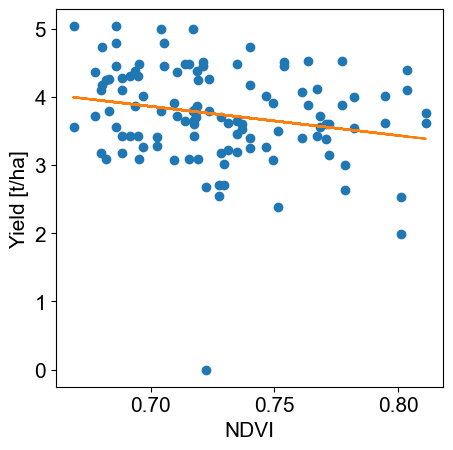

In [71]:
# NDVI IRRI 2017

param_of_interest = 'NDVI_17'
yearStudy = 2017

######

gdf = gpd.read_file('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/all_params_DS.gpkg')
gdfADM = gdf.groupby(['ADM3_EN','Class']).mean().reset_index()
#gdfADM_IR = gdfADM.loc[gdfADM['Class']=='Irrigated Rice']

# FINAL ONE!!!!!! EVI
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
#harvest = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
#production = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
#production = production[(production.param=='production')].reset_index(drop=True)
data = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
data = data[(data.param=='yield') & (data.year==2017)].reset_index(drop=True)
####### Select by criteria
#data = data[(data.year <= yearStudy) & (data.year >= yearStudy)].groupby(['muni','ecosystem']).mean().reset_index()
#######
#data = data.loc[data['ecosystem']=='irri'] # rf   OR    irri
#data
####
merged = pd.merge(data, gdfADM, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)

corr = merged.loc[:,[param_of_interest,'value']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient

#g = sns.scatterplot(x=param_of_interest, y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
#               );
#plt.title('EVI - 2017 - Whole Area', fontsize=17)
#g.set_xlabel('EVI')
#g.set_ylabel('Annual Yield [t/ha]')
#g.text(.74,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
#sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.show()

x = np.array(merged.loc[:,[param_of_interest]]).flatten()
y = np.array(merged.loc[:,['value']]).flatten()
print('r =', scipy.stats.pearsonr(x,y)[0], 'pval =', scipy.stats.pearsonr(x,y)[1])
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('NDVI')
ax.set_ylabel('Yield [t/ha]')
#ax.legend(facecolor='white')
plt.show()